# 📊 Polynomial Regression from Scratch: Stock Price Prediction

In this project, we implement **Polynomial Regression** from scratch using **NumPy**, applying it to real-world stock market data. This serves both as a learning exercise and a practical demonstration of how polynomial models can fit non-linear data patterns.

---

## 🔍 Project Goals

- Understand the mathematical foundation of polynomial regression.
- Implement the normal equation manually (without using `sklearn`).
- Apply feature scaling and polynomial feature expansion.
- Train and evaluate the model using Mean Squared Error (MSE).
- Compare the custom implementation with scikit-learn's `LinearRegression`.

---

## 🗃️ Dataset

We use a real stock dataset, with:
- **X**: Number of days since the start (as a single feature).
- **y**: Closing stock price on that day.

The dataset contains over **1000 samples**, making it suitable for testing model accuracy and overfitting.

---

## 🛠️ Key Components

- Polynomial feature expansion
- Manual computation of model parameters using the **normal equation**
- Prediction function
- MSE evaluation metric
- Visual comparison with scikit-learn's model

---

## ✅ Outcome

This project helps demonstrate:
- How polynomial regression captures non-linearity in data
- The reliability of manual implementation vs established libraries

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## 📈 Stock Data Analysis (Loading, Plotting, and Checking)

These cells performs three tasks:
1. Loads the dataset from a local CSV file.
2. Plots the stock closing prices using Seaborn.
3. Checks for any missing values in the data.


## Load the dataset

In [2]:
data = pd.read_csv("D:\data\stock_dataa.csv")
data.head()

,Day,Close
0,0,114.901425
1,1,101.571284
2,2,130.288712
3,3,161.126882
4,4,112.447710


## Plot the data

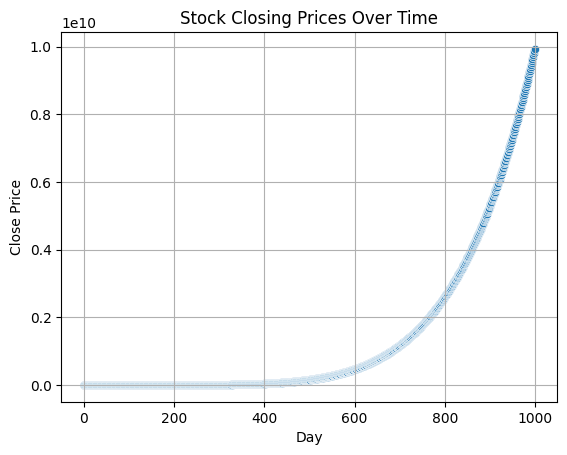

In [3]:
sns.scatterplot(data=data, x='Day', y='Close')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

## Check for missing values

In [4]:
data.isnull().sum()

Day      0
Close    0
dtype: int64

In [5]:
X = data[['Day']].values  
y = data['Close'].values  

### ⚙️ Feature Normalization (Standardization)

#### 📐 What We Do:
We use **standardization**, which transforms each feature as follows:

$$
x_{\text{norm}} = \frac{x - \mu}{\sigma}
$$

Where:  
- $ \mu $ = mean of the feature  
- $ \sigma $ = standard deviation of the feature    

This results in:
- Mean = 0  
- Standard Deviation = 1

> **Note:** Normalization is applied only to input features `X`, not the target variable `y`.


In [6]:
mean =np.mean(X)
std = np.std(X)
X_normalize = (X-mean) / std

### 🔀 Step 5: Train-Test Split

To evaluate the performance of our model on unseen data, we split our dataset into two parts:

- **Training Set**: Used to train the model (e.g., 80% of the data)
- **Testing Set**: Used to evaluate model performance (e.g., 20% of the data)

We use `train_test_split` from `sklearn.model_selection` to perform the split.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalize, y, test_size=0.2, random_state=42
)

### 🔢 Function: `add_degree(X, degree)`

This function expands the input feature `X` into a polynomial feature matrix by adding powers of `X` from degree 0 up to the given degree.

---

#### ✅ What It Does:

- Takes a single feature input `X` (shape: [n_samples, 1])
- Expands it into multiple columns representing:
  $$[
  X^0,\ X^1,\ X^2,\ ..., \ X^d
  ]$$
  where `d` is the input `degree`.



In [8]:
def add_degree(X,degree):
    degree = degree +1
    return np.hstack([X**i for i in range(degree)])


### 📘 Normal Equation Function

This function, `normal_equation`, calculates the optimal parameters (𝜃) for a linear regression model using the **normal equation** method.  
This approach provides a direct, analytical solution for linear regression, without requiring iterative algorithms like gradient descent.

---

#### 🧾 Function Inputs:
- **`X`**: A matrix of features, where each row is a training example.
- **`y`**: A vector of target values corresponding to each training example.

---

#### 🧠 The Normal Equation:


$$\theta = (X^T X)^{-1} X^T y$$


This equation gives the optimal values of 𝜃 that minimize the Mean Squared Error.

---


---

#### ✅ Output:
The function returns **`theta`**, a vector containing the learned weights.  
These weights can be used to make predictions on new data using:

$$
\hat{y} = X \theta
$$

---

In [9]:
def normal_equation(X, y):
    matrix_1 = np.dot(X.T, X)
    inverse = np.linalg.inv(matrix_1)
    matrix_2 = np.dot(X.T, y)
    
    theta = np.dot(inverse, matrix_2)
    
    return theta
    
    

### 🧠 Training the Polynomial Regression Model (Degree 6)

We expand the feature matrix to include polynomial terms up to degree 6 and then compute the optimal parameters using the normal equation:


In [10]:
X_train = add_degree(X_train,6)
X_test  = add_degree(X_test,6)
# train and get the theta
theta = normal_equation(X_train, y_train) 



### 📈 Prediction Function

We define a simple function to make predictions using the learned parameters `θ`

**As Y` = θ` x** 

In [11]:
def predict(X,theta):
    return np.dot(X,theta)

## make prediction

In [12]:
y_train_pred = predict(X_train, theta)
y_test_pred  = predict(X_test, theta)

### 📊 Mean Squared Error (MSE)

We define a function to calculate the **Mean Squared Error**, a common metric to evaluate regression models:


In [13]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)/2

## applay MSE

In [14]:
train_mse = mse(y_train, y_train_pred)
test_mse  = mse(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 1037.4924728413812
Test MSE: 949.654421461441


### 📈 Visualizing the Polynomial Regression Fit

We plot the actual data points and overlay the model's predictions to visually assess how well the curve fits the data.

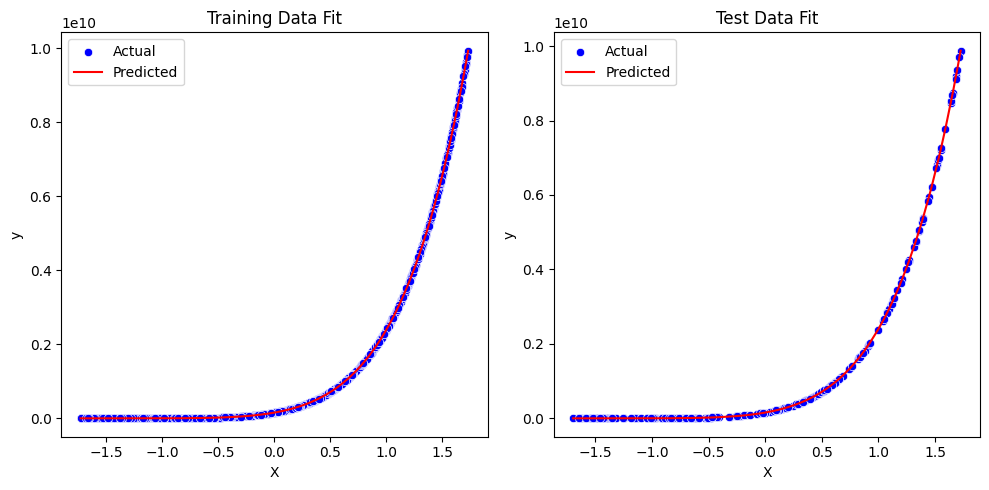

In [15]:
# Training Data Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train[:, 1], y=y_train, label="Actual", color="blue")
sns.lineplot(x=X_train[:, 1], y=y_train_pred, label="Predicted", color="red")
plt.title("Training Data Fit")
plt.xlabel("X")
plt.ylabel("y")

# Test Data Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 1], y=y_test, label="Actual", color="blue")
sns.lineplot(x=X_test[:, 1], y=y_test_pred, label="Predicted", color="red")
plt.title("Test Data Fit")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()

### 🤖 Comparing Custom Polynomial Regression vs. Scikit-learn
We use `PolynomialFeatures` and `LinearRegression` from `sklearn` to compare results with our scratch implementation.


In [16]:
# Step 1: Transform features
poly = PolynomialFeatures(degree=6, include_bias=True)
X_train_poly = poly.fit_transform(X_train[:, 1].reshape(-1, 1))
X_test_poly = poly.transform(X_test[:, 1].reshape(-1, 1))

# Step 2: Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 3: Predict
y_train_pred_sklearn = model.predict(X_train_poly)
y_test_pred_sklearn = model.predict(X_test_poly)

# Step 4: Evaluate
train_mse_sklearn = mse(y_train, y_train_pred_sklearn)
test_mse_sklearn = mse(y_test, y_test_pred_sklearn)

print(f"Sklearn Train MSE: {train_mse_sklearn}")
print(f"Sklearn Test MSE: {test_mse_sklearn}")

Sklearn Train MSE: 1037.4924725527248
Sklearn Test MSE: 949.6547103299297


### 📈 Visualizing Predictions: Custom Model vs Scikit-learn

We plot the predictions from both models alongside the true values to compare their performance visually.

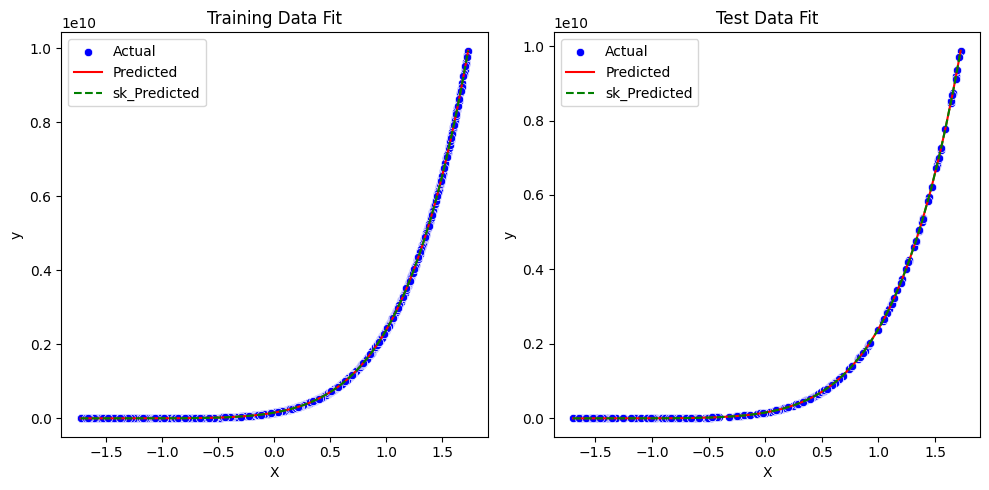

In [22]:
# Training Data Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train[:, 1], y=y_train, label="Actual", color="blue")
sns.lineplot(x=X_train[:, 1], y=y_train_pred, label="Predicted", color="red")
sns.lineplot(x=X_train[:, 1], y=y_train_pred_sklearn, label="sk_Predicted",linestyle='--' ,color="green")
plt.title("Training Data Fit")
plt.xlabel("X")
plt.ylabel("y")

# Test Data Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 1], y=y_test, label="Actual", color="blue")
sns.lineplot(x=X_test[:, 1], y=y_test_pred, label="Predicted", color="red")
sns.lineplot(x=X_test[:, 1], y=y_test_pred_sklearn, label="sk_Predicted",linestyle='--' ,color="green")
plt.title("Test Data Fit")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()

### 👨‍💻 Author

**Mohamed waleed (Elmasry)**  
Aspiring Data Scientist  
[GitHub](https://github.com/Mohamed-Elmasry16) | [LinkedIn](https://www.linkedin.com/in/mohamed-elmasry16)

This notebook was created as part of my personal learning journey to implement Linear Regression and Gradient Descent **from scratch** 

---